In [2]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import random

In [3]:
df = pd.read_csv('mnist_new2.csv')

In [4]:
df_cd_temp = df

# normal model

In [5]:
myacc = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)

        from keras.models import load_model
        model = load_model('MnistNormal'+ str(myround) + '.h5')
        myacc[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 7ms/step - loss: 1.0295e-04 - accuracy: 1.0000


12/12 [==============================] - 0s 8ms/step - loss: 0.2768 - accuracy: 0.9443


In [6]:
myacc

array([[1.        , 1.        , 1.        , 0.99751246, 0.92665035],
       [0.9975    , 1.        , 1.        , 0.99468082, 0.95098037],
       [1.        , 0.99519229, 1.        , 1.        , 0.93975902],
       [1.        , 1.        , 1.        , 0.99275362, 0.93939394],
       [1.        , 1.        , 1.        , 0.99738222, 0.93658537],
       [1.        , 0.99470901, 1.        , 0.99511003, 0.92537314],
       [1.        , 1.        , 1.        , 0.99738902, 0.92548078],
       [1.        , 1.        , 1.        , 1.        , 0.91968912],
       [1.        , 1.        , 1.        , 1.        , 0.93617022],
       [1.        , 1.        , 0.99765807, 0.99726778, 0.95013124],
       [1.        , 1.        , 1.        , 1.        , 0.95161289],
       [1.        , 1.        , 0.99759614, 1.        , 0.92944038],
       [1.        , 1.        , 1.        , 1.        , 0.95238096],
       [0.99745548, 1.        , 1.        , 0.99242425, 0.93673968],
       [1.        , 0.99760193, 0.

In [7]:
nn = 0
meanPerBin = np.zeros(5)
for myturn in range (5):
    meanPerBin[myturn] = np.mean(myacc[:, myturn])
    nn += (np.mean(myacc[:, myturn]))
print(nn/5)
print(meanPerBin)

0.9873593461513519
[0.99949678 0.99912946 0.99951395 0.99773539 0.94092114]


In [8]:
myhist = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhist[myround-1,mydiff] = len(df_test_temp)
myhist

array([[393., 393., 403., 402., 409.],
       [400., 399., 417., 376., 408.],
       [404., 416., 381., 384., 415.],
       [384., 381., 425., 414., 396.],
       [377., 400., 431., 382., 410.],
       [408., 378., 403., 409., 402.],
       [388., 405., 408., 383., 416.],
       [429., 390., 408., 387., 386.],
       [409., 389., 394., 385., 423.],
       [444., 382., 427., 366., 381.],
       [395., 390., 373., 408., 434.],
       [407., 401., 416., 365., 411.],
       [404., 397., 451., 391., 357.],
       [393., 414., 386., 396., 411.],
       [377., 417., 402., 408., 396.],
       [393., 407., 368., 393., 439.],
       [404., 402., 389., 377., 428.],
       [409., 387., 412., 378., 414.],
       [418., 383., 385., 396., 418.],
       [416., 404., 384., 419., 377.]])

In [9]:
myhistAccum = np.zeros (5)
for histindex in range (5):
    myhistAccum[histindex] = np.sum(myhist[:, histindex])
print(myhistAccum)

[8052. 7935. 8063. 7819. 8131.]


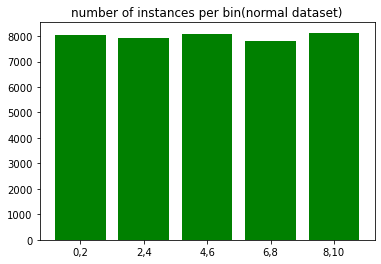

In [10]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum, color='green')
plt.title("number of instances per bin(normal dataset)")
plt.show()

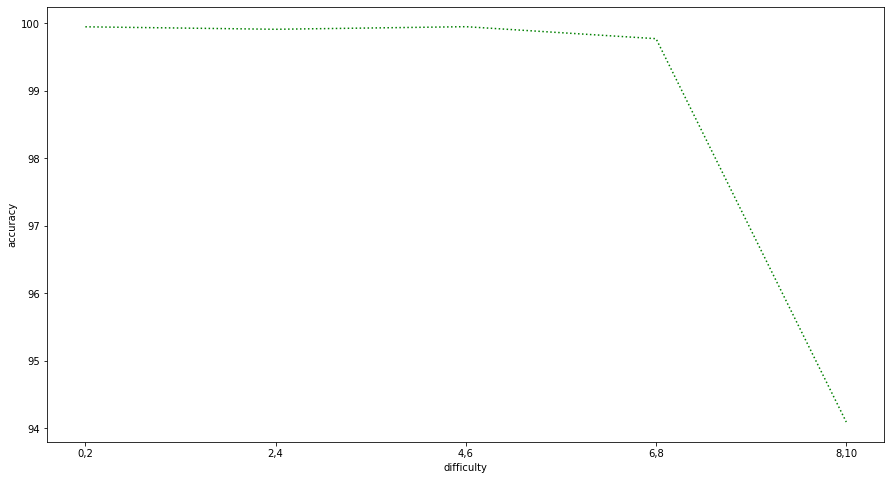

In [45]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

In [11]:
#meanPerBin = [0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944]
#meanPerBin = np.array(meanPerBin)

# contaminated model

In [13]:
myaccCont = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
#     hardest =  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistContaminated'+ str(myround) + '.h5')
        myaccCont[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


6/6 [==============================] - 0s 9ms/step - loss: 8.8324e-06 - accuracy: 1.0000


32/32 [==============================] - 0s 7ms/step - loss: 0.1830 - accuracy: 0.9633


In [14]:
myaccCont

array([[1.        , 1.        , 1.        , 1.        , 0.96192384],
       [1.        , 1.        , 1.        , 1.        , 0.96595329],
       [0.99476439, 0.99528301, 1.        , 1.        , 0.95631069],
       [1.        , 1.        , 1.        , 0.99738222, 0.96914178],
       [1.        , 0.99504948, 1.        , 0.99731183, 0.9603098 ],
       [1.        , 1.        , 1.        , 0.99483204, 0.9744848 ],
       [0.99459457, 1.        , 1.        , 0.99435025, 0.95472062],
       [0.99512196, 1.        , 1.        , 1.        , 0.95481336],
       [1.        , 1.        , 1.        , 0.99473685, 0.96735907],
       [1.        , 1.        , 1.        , 0.99460918, 0.95617533],
       [1.        , 1.        , 1.        , 1.        , 0.95009786],
       [1.        , 1.        , 1.        , 0.99728262, 0.95725644],
       [1.        , 0.99528301, 1.        , 0.99731904, 0.95325202],
       [1.        , 1.        , 1.        , 0.99738902, 0.96414727],
       [1.        , 1.        , 0.

In [15]:
nnCont = 0
meanPerBinCont = np.zeros(5)
for myturn in range (5):
    meanPerBinCont[myturn] = np.mean(myaccCont[:, myturn])
    nnCont += (np.mean(myaccCont[:, myturn]))
print(nnCont/5)
print(meanPerBinCont)

0.9908788299560547
[0.99895809 0.99901196 0.99951686 0.99761498 0.95929226]


In [16]:
myhistCont = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    #hardest=  hardest.drop(columns="Dffclt")
    hardest = hardest.iloc[:11000,:]
    shuffled_hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = shuffled_hardest.iloc[:10000,:]
    hardest = shuffled_hardest.iloc[10000:11000,:]
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont[myround-1,mydiff] = len(df_test_temp)
myhistCont

array([[ 200.,  194.,  205.,  403.,  998.],
       [ 200.,  202.,  215.,  355., 1028.],
       [ 191.,  212.,  202.,  365., 1030.],
       [ 184.,  189.,  208.,  382., 1037.],
       [ 187.,  202.,  206.,  372., 1033.],
       [ 198.,  189.,  207.,  387., 1019.],
       [ 185.,  202.,  221.,  354., 1038.],
       [ 205.,  170.,  220.,  387., 1018.],
       [ 214.,  200.,  195.,  380., 1011.],
       [ 213.,  197.,  215.,  371., 1004.],
       [ 210.,  193.,  183.,  392., 1022.],
       [ 220.,  211.,  195.,  368., 1006.],
       [ 206.,  212.,  225.,  373.,  984.],
       [ 194.,  200.,  191.,  383., 1032.],
       [ 194.,  203.,  209.,  374., 1020.],
       [ 188.,  195.,  175.,  375., 1067.],
       [ 199.,  195.,  191.,  388., 1027.],
       [ 213.,  186.,  205.,  380., 1016.],
       [ 204.,  208.,  187.,  384., 1017.],
       [ 219.,  194.,  190.,  388., 1009.]])

In [17]:
myhistAccumCont = np.zeros (5)
for histindex in range (5):
    myhistAccumCont[histindex] = np.sum(myhistCont[:, histindex])
print(myhistAccumCont)

[ 4024.  3954.  4045.  7561. 20416.]


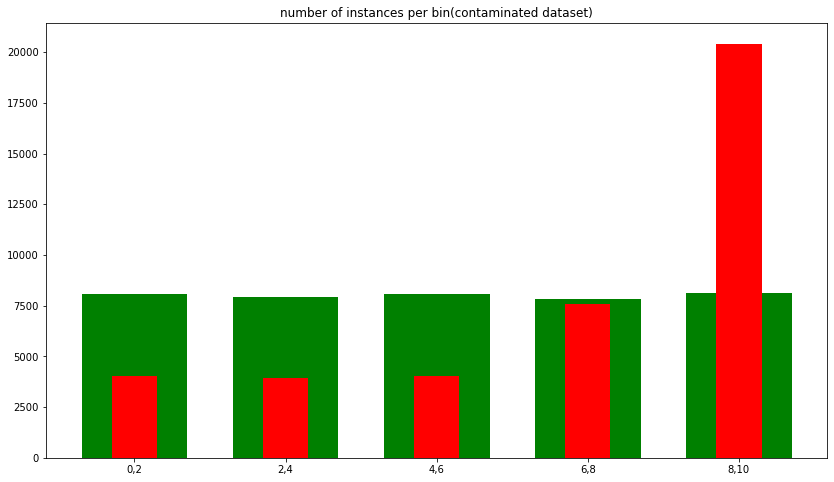

In [18]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.7, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.3, color = 'red')

plt.title("number of instances per bin(contaminated dataset)")
plt.show()

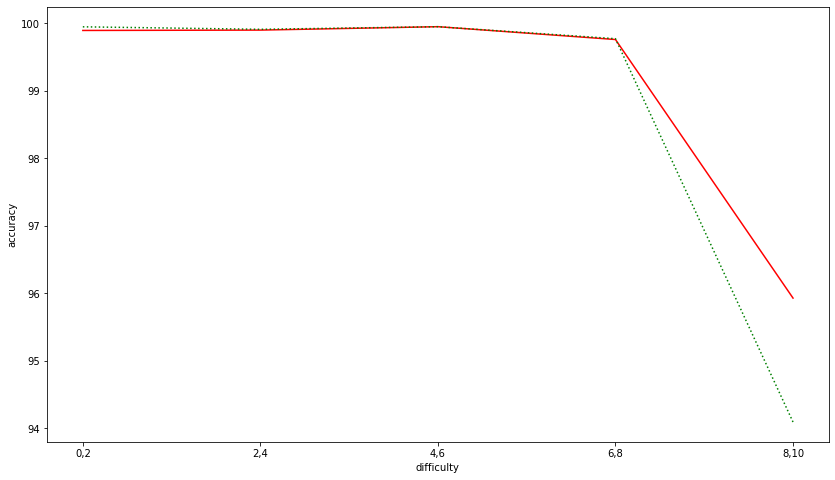

In [19]:
plt.xlabel("difficulty")
plt.ylabel("accuracy")
plt.rcParams['figure.figsize'] = [14, 8]
#plt.ylim([0, 105])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.show()

# Contaminate model on normal data

In [20]:
myaccCont_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistContaminated'+ str(myround) + '.h5')
        myaccCont_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 5ms/step - loss: 1.9340e-04 - accuracy: 1.0000


12/12 [==============================] - 0s 6ms/step - loss: 0.1172 - accuracy: 0.9708


In [21]:
nnCont_nor = 0
meanPerBinCont_nor = np.zeros(5)
for myturn in range (5):

    meanPerBinCont_nor[myturn] = np.mean(myaccCont_nor[:, myturn])
    nnCont_nor += (np.mean(myaccCont_nor[:, myturn]))
print(nnCont_nor/5)
print(meanPerBinCont_nor)

0.9905554687976836
[0.99875874 0.99925601 0.99950969 0.99844249 0.95681041]


In [22]:
myhistCont_nor = np.zeros((5,10))

for myroundCont_nor in range(1,6):
    df_cd = df_cd_temp.sample(frac=1, random_state=myroundCont_nor)
    df_cd1 =  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:20000,:]
    df_test = df_cd1.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistCont_nor[myroundCont_nor-1,mydiff] = len(df_test_temp)
myhistCont_nor

array([[393., 393., 403., 402., 409.,   0.,   0.,   0.,   0.,   0.],
       [400., 399., 417., 376., 408.,   0.,   0.,   0.,   0.,   0.],
       [404., 416., 381., 384., 415.,   0.,   0.,   0.,   0.,   0.],
       [384., 381., 425., 414., 396.,   0.,   0.,   0.,   0.,   0.],
       [377., 400., 431., 382., 410.,   0.,   0.,   0.,   0.,   0.]])

In [23]:
myhistAccumCont_nor = np.zeros (5)
for histindex in range (5):
    myhistAccumCont_nor[histindex] = np.sum(myhistCont_nor[:, histindex])
print(myhistAccumCont_nor)

[1958. 1989. 2057. 1958. 2038.]


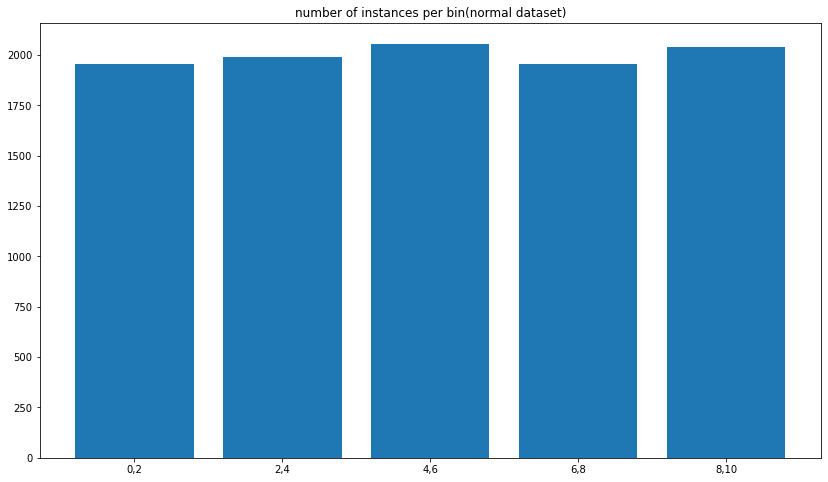

In [24]:
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont_nor)
plt.title("number of instances per bin(normal dataset)")
plt.show()

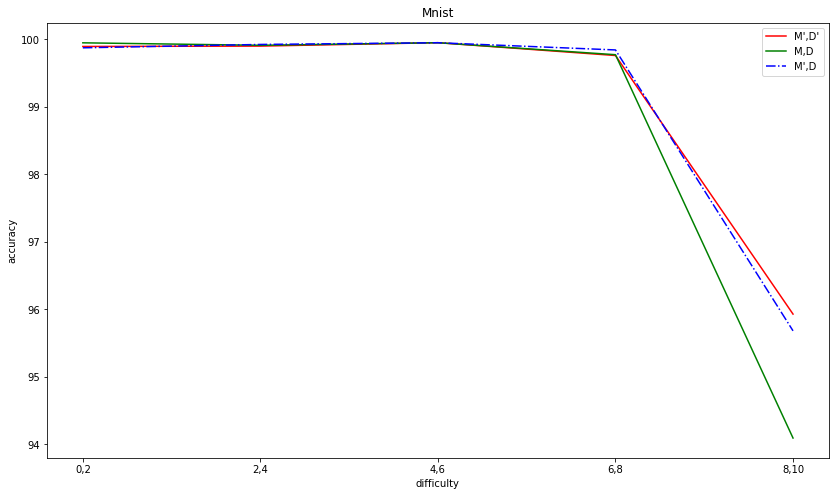

In [46]:
plt.title("Mnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.legend(["M',D'","M,D", "M',D"])
plt.show()

# Balanced dataset

In [26]:
myaccBal = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)
    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    data = df_cd#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistBalanced'+ str(myround) + '.h5')
        myaccBal[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


10/10 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 1.0000


30/30 [==============================] - 0s 7ms/step - loss: 0.3153 - accuracy: 0.9471


In [27]:
nnBal = 0
meanPerBinBal = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal[:, myturn])))
    meanPerBinBal[myturn] = np.mean(myaccBal[:, myturn])
    nnBal += (np.mean(myaccBal[:, myturn]))
nnBal/5

0.9985158324241639
0.9988034099340439
0.9978761523962021
0.997644791007042
0.9555123835802078


0.9896705138683319

In [28]:
myhistBal = np.zeros((20,5))

for myround in range(1,21):
    df_cd = df_cd_temp.sample(frac=1, random_state=myround)
    hardest= df_cd[25000:]
    hardest=hardest.sort_values('Dffclt', ascending=False)
    hardestbalanced = hardest[:1]
    for item_class in range (10):
        hardestTemp = hardest[hardest['class']==item_class]
        hardestbalanced = hardestbalanced.append(hardestTemp.iloc[:1100,:], ignore_index=True)

    hardestbalanced = hardestbalanced.iloc[1:,:]
    hardestbalanced = hardestbalanced.sample(frac=1, random_state=myround)
    #hardestbalanced=  hardestbalanced.drop(columns="Dffclt")
    contaminated_trianset = hardestbalanced.iloc[1000:11000,:]
    hardest = hardestbalanced.iloc[:1000,:]
    df_cd1=  df_cd#.drop(columns="Dffclt")
    df_train = df_cd1.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    df_test = df_cd1.iloc[20000:21000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        myhistBal[myround-1,mydiff] = len(df_test_temp)
myhistBal

array([[ 287.,  201.,  235.,  336.,  941.],
       [ 286.,  206.,  246.,  284.,  978.],
       [ 269.,  216.,  231.,  309.,  975.],
       [ 270.,  193.,  234.,  335.,  968.],
       [ 259.,  206.,  241.,  340.,  954.],
       [ 280.,  189.,  239.,  316.,  976.],
       [ 250.,  204.,  248.,  301.,  997.],
       [ 276.,  173.,  253.,  327.,  971.],
       [ 283.,  201.,  219.,  320.,  977.],
       [ 296.,  198.,  248.,  308.,  950.],
       [ 296.,  197.,  215.,  335.,  957.],
       [ 287.,  213.,  227.,  294.,  979.],
       [ 291.,  214.,  259.,  320.,  916.],
       [ 279.,  203.,  220.,  307.,  991.],
       [ 264.,  206.,  241.,  325.,  964.],
       [ 270.,  198.,  216.,  328.,  988.],
       [ 277.,  196.,  216.,  300., 1011.],
       [ 298.,  188.,  232.,  314.,  968.],
       [ 295.,  208.,  216.,  310.,  971.],
       [ 311.,  200.,  209.,  335.,  945.]])

In [29]:
myhistAccumBal = np.zeros (5)
for histindex in range (5):
    myhistAccumBal[histindex] = np.sum(myhistBal[:, histindex])
print(myhistAccumBal)

[ 5624.  4010.  4645.  6344. 19377.]


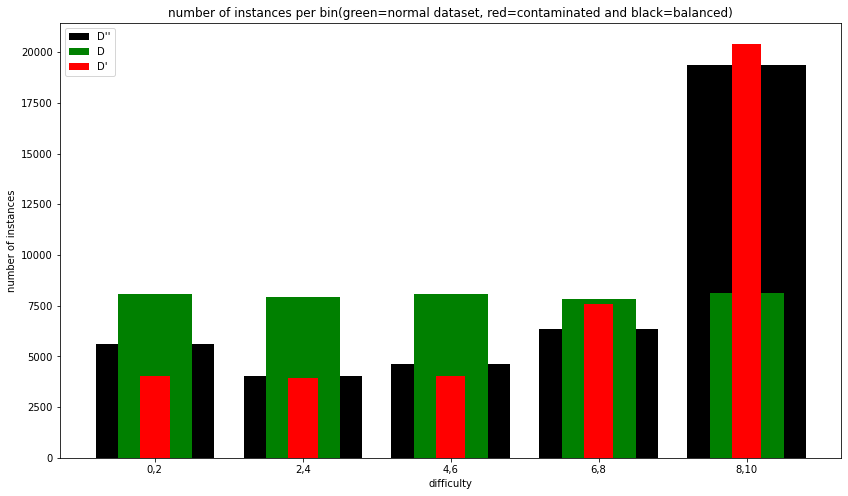

In [30]:
plt.xlabel("difficulty")
plt.ylabel("number of instances")
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumBal,width=0.8, color='black')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccum,width=0.5, color='green')
plt.bar(['0,2','2,4','4,6','6,8','8,10'], myhistAccumCont,width=0.2, color = 'red')
plt.title("number of instances per bin(green=normal dataset, red=contaminated and black=balanced)")
plt.legend(["D''","D", "D'"])
plt.show()

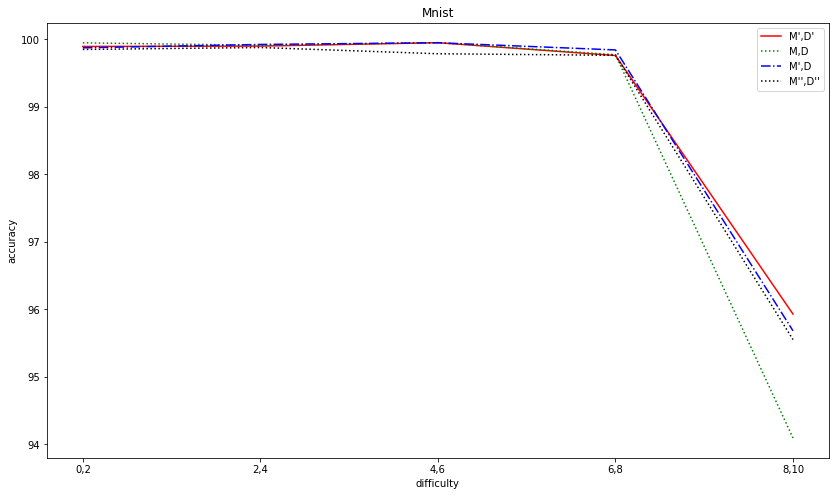

In [47]:
plt.title("Mnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.legend(["M',D'","M,D", "M',D","M'',D''"])
plt.show()

# M'' on D

In [32]:
myaccBal_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistBalanced'+ str(myround) + '.h5')
        myaccBal_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 0.9974


12/12 [==============================] - 0s 7ms/step - loss: 0.2003 - accuracy: 0.9576


In [33]:
nnBal_nor = 0
meanPerBinBal_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccBal_nor[:, myturn])))
    meanPerBinBal_nor[myturn] = np.mean(myaccBal_nor[:, myturn])
    nnBal_nor += (np.mean(myaccBal_nor[:, myturn]))
print(nnBal_nor/5)
meanPerBinBal_nor

0.9995052337646484
0.9987470448017121
0.9992618709802628
0.9979568779468536
0.9569828778505325
0.990490781068802


array([0.99950523, 0.99874704, 0.99926187, 0.99795688, 0.95698288])

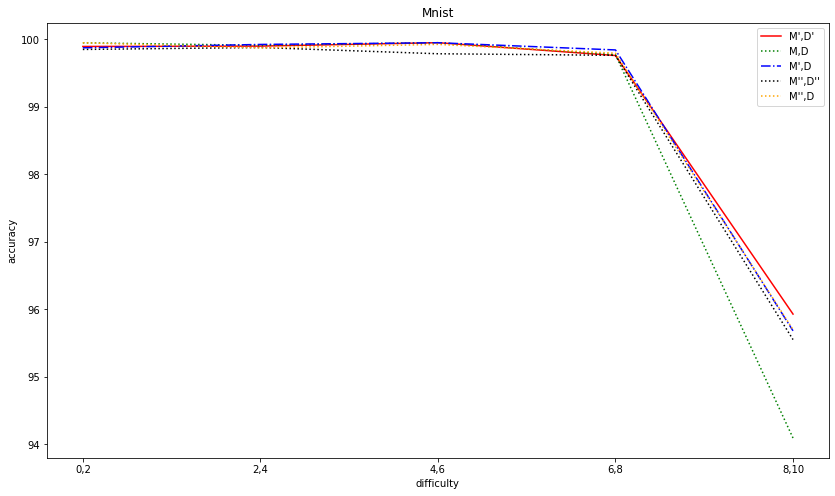

In [48]:
plt.title("Mnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls=':', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D"])
plt.show()

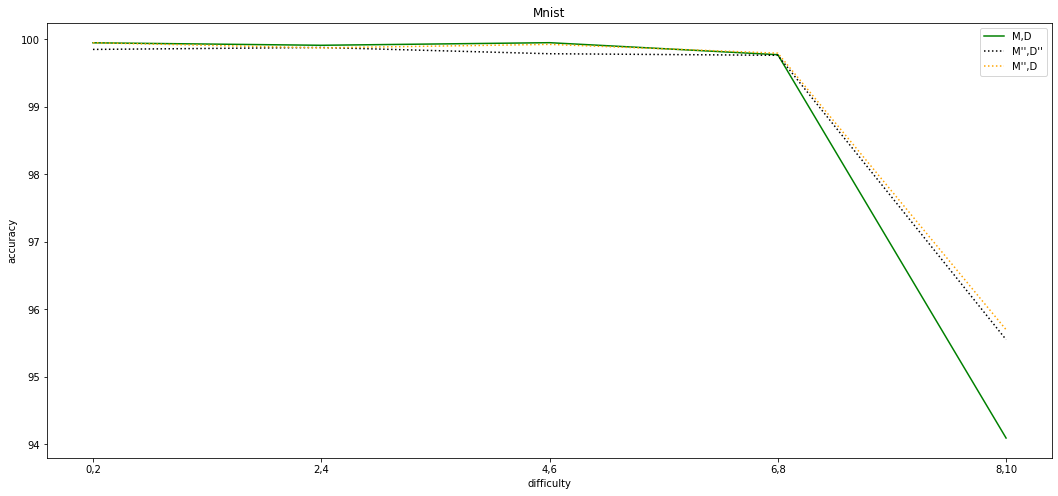

In [51]:
plt.title("Mnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [18, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')

plt.legend(["M,D","M'',D''","M'',D"])
plt.show()

# EasyOut 


In [36]:
myaccEasyOut = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    df_cd = df.sample(frac=1, random_state=myround)
    hardest = df_cd[25000:]
    hardest = hardest.sort_values('Dffclt', ascending=False)
    hardest = hardest.iloc[:11000,:]
    hardest = hardest.sample(frac=1, random_state=myround)
    contaminated_trianset = hardest.iloc[:10000,:]
    hardest = hardest.iloc[10000:11000,:]
    df_easyout = df_cd .iloc[:22000,:]
    df_easyout = df_easyout.sort_values('Dffclt', ascending=True)
    df_easyout = df_easyout.iloc[6000:,:]
    df_easyout = df_easyout.sample(frac=1, random_state=myround)
    data = df_easyout#.drop(columns="Dffclt")
    df_train = data.iloc[:10000,:]
    df_train = df_train.append(contaminated_trianset, ignore_index=True)
    df_train = df_train.sample(frac=1, random_state=myround)
    df_test = data.iloc[10000:11000,:]
    df_test = df_test.append(hardest, ignore_index=True)
    df_test = df_test.sample(frac=1, random_state=myround)
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (1,5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistEasyout'+ str(myround) + '.h5')
        myaccEasyOut[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


35/35 [==============================] - 1s 7ms/step - loss: 0.1706 - accuracy: 0.9655


In [37]:
myaccEasyOut = myaccCont

In [38]:
nnEasyout = 0
meanPerBinEasyout = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasyOut[:, myturn])))
    meanPerBinEasyout[myturn] = np.mean(myaccEasyOut[:, myturn])
    nnEasyout += (np.mean(myaccEasyOut[:, myturn]))
nnEasyout/5

0.9989580869674682
0.9990119576454163
0.9995168626308442
0.9976149827241898
0.959292259812355


0.9908788299560547

In [39]:
meanPerBinEasyout

array([0.99895809, 0.99901196, 0.99951686, 0.99761498, 0.95929226])

# Easyout on Normal

In [40]:
myaccEasy_nor = np.zeros((20,5))

for myround in range(1,21):
    random.seed(myround)
    np.random.seed(myround)
    tf.random.set_seed(myround)
    data = df.sample(frac=1, random_state=myround)
    df_train = data.iloc[:20000,:]
    df_test = data.iloc[20000:22000,:]
    df_train = df_train.drop(columns="Dffclt")
    for mydiff in range (5):
        df_test_temp = df_test.loc[(df_test['Dffclt'] >= (mydiff*2)) & (df_test['Dffclt'] <= ((mydiff+1)*2))]
        df_test_temp = df_test_temp.drop(columns="Dffclt")
        
        trainX = df_train.drop(columns="class")
        trainY = df_train['class']
        testX = df_test_temp.drop(columns="class")
        testY = df_test_temp['class']
        trainX=np.array(trainX)
        testX=np.array(testX)
        trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
        testX = testX.reshape((testX.shape[0], 28, 28, 1))
        trainX = trainX/255
        testX = testX/255
        trainY = np_utils.to_categorical(trainY,10)
        testY = np_utils.to_categorical(testY,10)
        from keras.models import load_model
        model = load_model('MnistEasyout'+ str(myround) + '.h5')
        myaccEasy_nor[myround-1,mydiff] = (model.evaluate(testX,testY)[1])


12/12 [==============================] - 0s 8ms/step - loss: 4.8766e-04 - accuracy: 1.0000


12/12 [==============================] - 0s 4ms/step - loss: 0.0381 - accuracy: 0.9867


In [41]:
nnEasy_nor = 0
meanPerBinEasy_nor = np.zeros(5)
for myturn in range (5):
    print((np.mean(myaccEasy_nor[:, myturn])))
    
    meanPerBinEasy_nor[myturn] = np.mean(myaccEasy_nor[:, myturn])
    nnEasy_nor += (np.mean(myaccEasy_nor[:, myturn]))
print(nnEasy_nor/5)
meanPerBinEasy_nor

0.9955699920654297
0.999505752325058
1.0
0.9991158723831177
0.9854519307613373
0.9959287095069886


array([0.99556999, 0.99950575, 1.        , 0.99911587, 0.98545193])

# retrieve Data

In [42]:
# meanPerBin = np.array([0.79911429, 0.8317701 , 0.8279106 , 0.81521758, 0.81394129,0.79659775, 0.78136204, 0.7744887 , 0.74064942, 0.67989944])
# meanPerBinCont = np.array([0.7800258,  0.83596367, 0.83271156, 0.81696018, 0.82122909, 0.79755006, 0.79041608, 0.76958496, 0.74295535, 0.69217899])
# meanPerBinCont_nor = np.array([0.79357795, 0.83053856, 0.82169406, 0.82186363, 0.82370602, 0.79388916, 0.77930374, 0.77309898, 0.74168162, 0.68372838])
# meanPerBinBal = np.array([0.78498974, 0.83855680, 0.82553396, 0.82107758, 0.81414839, 0.80924323, 0.81469207, 0.76007291, 0.73365259, 0.69200589])
# meanPerBinBal_nor = np.array([0.79348715, 0.83166712, 0.82205704, 0.81883997, 0.81243234, 0.79869765, 0.78910854, 0.77951118, 0.73790904, 0.69339632])
# meanPerBinEasyout = np.array([0.79334218 , 0.79334218 , 0.79334218, 0.80756179, 0.8131354 , 0.79361026, 0.79262054, 0.78199897, 0.73976877, 0.70033181])
# meanPerBinEasy_nor = np.array([0.78499383, 0.82561504, 0.82931231, 0.82032643, 0.81302297, 0.78776397, 0.79233419, 0.77548839, 0.74970538, 0.69538593])

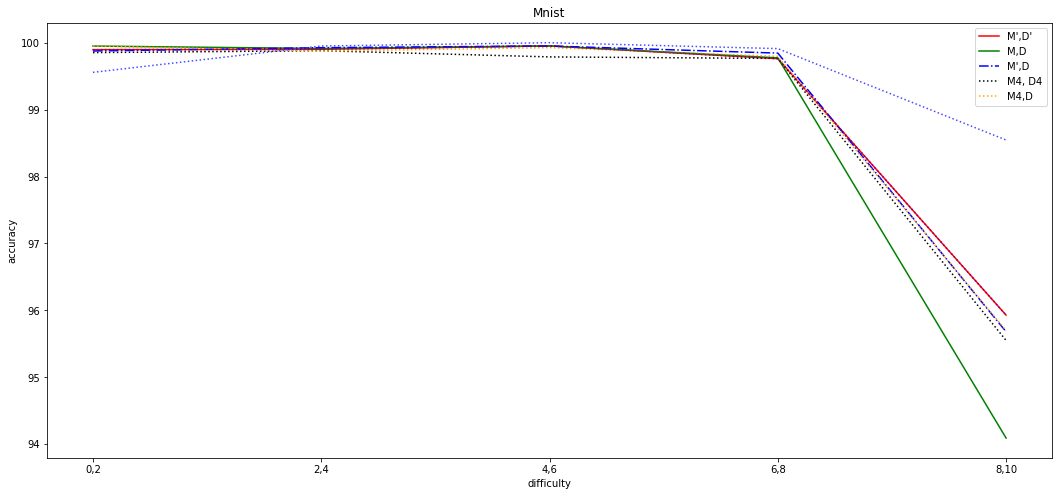

In [52]:
plt.title("Mnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont*100, ls='-', color = 'red')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinCont_nor*100, ls='-.', color = 'blue')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal*100, ls=':', color = 'black')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinBal_nor*100, ls=':', color = 'orange')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')
#plt.legend(["M',D'","M,D", "M',D","M'',D''","M'',D", "M4, D4", "M4,D"])
plt.legend(["M',D'","M,D", "M',D","M4, D4", "M4,D"])
plt.show()



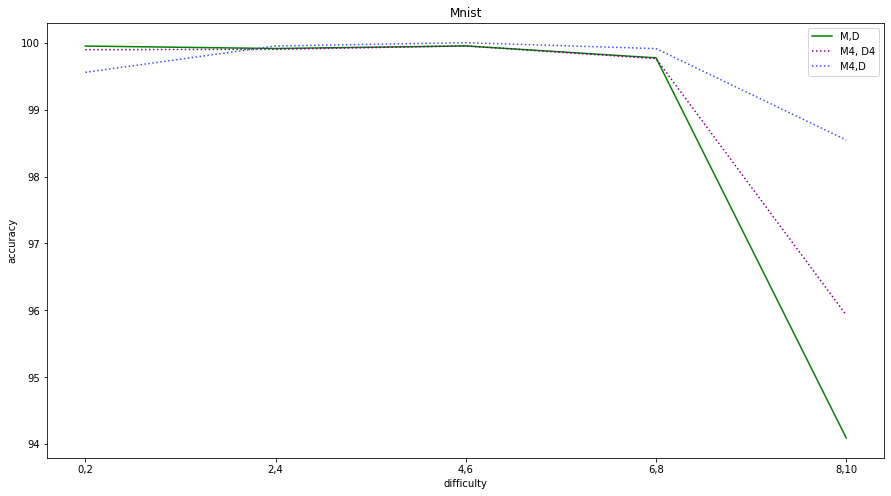

In [53]:
plt.title("Mnist")
plt.xlabel("difficulty")
plt.ylabel("accuracy")
#plt.ylim([0, 100])
#plt.figure(figsize=(16,8))
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBin*100, ls='-', color = 'green')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasyout*100, ls=':', color = 'purple')
plt.plot(['0,2','2,4','4,6','6,8','8,10'], meanPerBinEasy_nor*100, ls=':', color = '#4649FF')


plt.legend(["M,D", "M4, D4", "M4,D"])
plt.show()